CMP6202

# Objectives
In this lab you will implement:
* RandomForest
* LogisticRegression
* Support Vector Machine
* Over_Sampling - SMOTE
* Under_Sampling - TomeLinks



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from collections import Counter
%matplotlib inline

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# water_potability.csv

In [36]:
waterData = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/water_potability.csv')

In [37]:
waterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [38]:
imp_mean = SimpleImputer(strategy= 'mean')

In [39]:
waterImputed = imp_mean.fit_transform(waterData)

In [40]:
waterPotability = pd.DataFrame(waterImputed, columns=waterData.columns)

In [41]:
waterPotability.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: xlabel='Potability', ylabel='count'>

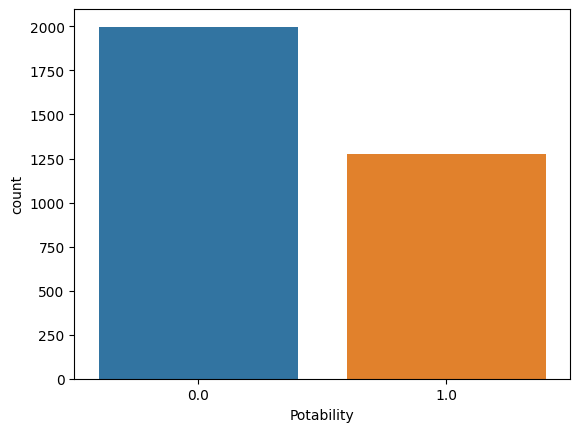

In [42]:
sns.countplot(data = waterPotability, x ='Potability')

# Splitting data into training and testing sets

Splitting 80/10/10

In [78]:
X = waterPotability.drop('Potability', axis=1)
y = waterPotability['Potability']
X_WaterTrain, X_WaterTemp, y_WaterTrain, y_WaterTemp = train_test_split(X, y, test_size = 0.2, random_state=39)
X_WaterValidation, X_WaterTest, y_WaterValidation, y_WaterTest = train_test_split(X_WaterTemp, y_WaterTemp, test_size = 0.5, random_state=39)

In [76]:
X_WaterTrain.shape, X_WaterTest.shape, y_WaterTrain.shape, y_WaterTest.shape

((2620, 9), (656, 9), (2620,), (656,))

In [63]:
sc = StandardScaler()

In [64]:
X_train = sc.fit_transform(X_WaterTrain)

In [65]:
X_test = sc.transform(X_WaterTest)

## SVM Model


In [79]:
clf_svm = SVC()
clf_svm.fit(X_WaterTrain, y_WaterTrain)

SVC()

In [67]:
y_pred = clf_svm.predict(X_WaterTest)

In [68]:
svm_acc = accuracy_score(y_WaterTest, y_pred)

In [69]:
print(svm_acc)

0.6951219512195121


In [70]:
print(classification_report(y_WaterTest, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.95      0.79       396
         1.0       0.81      0.30      0.44       260

    accuracy                           0.70       656
   macro avg       0.74      0.63      0.61       656
weighted avg       0.73      0.70      0.65       656



# Cross_validation

In [71]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [72]:
cross_val_score(SVC(), X_WaterTrain, y_WaterTrain, cv=cv)

array([0.66412214, 0.66793893, 0.61068702, 0.63740458, 0.70992366,
       0.69847328, 0.64122137, 0.66793893, 0.65267176, 0.69847328])

In [73]:
print('Mean Accuracy : ', np.mean(cross_val_score(SVC(), X_WaterTrain, y_WaterTrain, cv=cv)))

Mean Accuracy :  0.6648854961832061
